In [21]:
#IMPORTING CLASSES TO BE USED FOR DATA EXPLORATION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA EXPLORATION AND DATA CLEANING

In [22]:
# Creating data frame
# Try decoding the file with different codecs
possible_codecs = ['utf-8', 'latin-1', 'cp1252']
for codec in possible_codecs:
    try:
        df = pd.read_csv("/content/dq_ps_challenge_v2 1.csv", encoding=codec)
        print(f"File decoded successfully with {codec} encoding.")
        break
    except UnicodeDecodeError:
        print(f"Failed to decode with {codec} encoding.")

# If none of the codecs work, raise an error
else:
    raise ValueError("Unable to decode the file with any of the specified encodings.")

# Now df contains your DataFrame with the data from the CSV file, encoding='utf-8', latin = "")

File decoded successfully with utf-8 encoding.


In [23]:
df.head(10)

,idcol,interaction,int_date,item,page,tod,item_type,item_descrip,segment,beh_segment,active_ind
0,755,DISPLAY,17JAN2023,NONE,Screen1,Afternoon,ALL,NaN,segment3,B01,Semi Active
1,4521,DISPLAY,27FEB2023,NONE,Screen1,Afternoon,ALL,NaN,segment1,B07,Semi Active
2,4521,DISPLAY,18FEB2023,NONE,Screen1,Afternoon,ALL,NaN,segment1,B07,Semi Active
3,4521,DISPLAY,30JAN2023,NONE,Screen1,Morning,ALL,NaN,segment1,B07,Semi Active
4,4521,CLICK,05FEB2023,IBAB,Screen1,Afternoon,INSURE,GENERIC MESSAGE,segment1,B07,Semi Active
5,4521,CHECKOUT,05FEB2023,IBAB,Screen1,Afternoon,INSURE,GENERIC MESSAGE,segment1,B07,Semi Active
6,6145,DISPLAY,26FEB2023,NONE,Screen1,Evening,ALL,NaN,segment3,B01,Cold Start
7,6145,DISPLAY,27JAN2023,NONE,Screen1,Early,ALL,NaN,segment3,B01,Cold Start
8,6145,DISPLAY,10FEB2023,NONE,Screen1,Morning,ALL,NaN,segment3,B01,Cold Start
9,6145,DISPLAY,10JAN2023,NONE,Screen1,Afternoon,ALL,NaN,segment3,B01,Cold Start


In [24]:
df.describe()

,idcol
count,6.084300e+04
mean,1.283729e+07
std,7.560048e+06
min,2.000000e+00
25%,6.418901e+06
50%,1.275229e+07
75%,1.919363e+07
max,2.614190e+07


In [25]:
##DATA INSPECTION
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60843 entries, 0 to 60842
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   idcol         60843 non-null  int64 
 1   interaction   60842 non-null  object
 2   int_date      60842 non-null  object
 3   item          60842 non-null  object
 4   page          60842 non-null  object
 5   tod           60842 non-null  object
 6   item_type     60842 non-null  object
 7   item_descrip  33265 non-null  object
 8   segment       60842 non-null  object
 9   beh_segment   60842 non-null  object
 10  active_ind    60842 non-null  object
dtypes: int64(1), object(10)
memory usage: 5.1+ MB


In [26]:
##CHECKING FOR EMPTY DATA SET/NULL ENTRY
df.isnull().sum()

idcol               0
interaction         1
int_date            1
item                1
page                1
tod                 1
item_type           1
item_descrip    27578
segment             1
beh_segment         1
active_ind          1
dtype: int64

In [27]:
# Check for duplicate rows
df.duplicated().sum()

3977

In [28]:
# Find duplicated rows
duplicates = df.duplicated(keep=False)  # keep=False marks all duplicates as True

# Filter DataFrame to get only duplicated rows
duplicated_rows = df[duplicates]

print("Duplicated rows:")
print(duplicated_rows)

Duplicated rows:
          idcol interaction   int_date  item     page      tod  item_type  \
60        28951       CLICK  09JAN2023  CBPB  Screen1  Morning    CONNECT   
63        28951       CLICK  09JAN2023  CBPB  Screen1  Morning    CONNECT   
109       49398       CLICK  19MAR2023  CUPL  Screen1  Morning       LEND   
110       49398       CLICK  19MAR2023  CUPL  Screen1  Morning       LEND   
123       55558       CLICK  08FEB2023  MMMC  Screen1  Evening  LIFESTYLE   
...         ...         ...        ...   ...      ...      ...        ...   
60790  26099674       CLICK  27FEB2023  CSPL  Screen1  Morning       LEND   
60791  26100591       CLICK  01FEB2023  CBPA  Screen1    Early    CONNECT   
60792  26100591       CLICK  01FEB2023  CBPA  Screen1    Early    CONNECT   
60808  26107640       CLICK  30JAN2023  CUSZ  Screen2    Early     INVEST   
60810  26107640       CLICK  30JAN2023  CUSZ  Screen2    Early     INVEST   

                  item_descrip   segment beh_segment   act

In [29]:
display(df)

,idcol,interaction,int_date,item,page,tod,item_type,item_descrip,segment,beh_segment,active_ind
0,755,DISPLAY,17JAN2023,NONE,Screen1,Afternoon,ALL,NaN,segment3,B01,Semi Active
1,4521,DISPLAY,27FEB2023,NONE,Screen1,Afternoon,ALL,NaN,segment1,B07,Semi Active
2,4521,DISPLAY,18FEB2023,NONE,Screen1,Afternoon,ALL,NaN,segment1,B07,Semi Active
3,4521,DISPLAY,30JAN2023,NONE,Screen1,Morning,ALL,NaN,segment1,B07,Semi Active
4,4521,CLICK,05FEB2023,IBAB,Screen1,Afternoon,INSURE,GENERIC MESSAGE,segment1,B07,Semi Active
...,...,...,...,...,...,...,...,...,...,...,...
60838,26141576,DISPLAY,23JAN2023,NONE,Screen1,Afternoon,ALL,NaN,segment1,B18,Active
60839,26141576,CLICK,03JAN2023,MMSM,Screen1,Afternoon,LIFESTYLE,MONEY MANAGEMENT_SENDMONE,segment1,B18,Active
60840,26141905,DISPLAY,27JAN2023,NONE,Screen1,Evening,ALL,NaN,segment3,B08,Semi Active
60841,26141905,DISPLAY,28MAR2023,NONE,Screen1,Early,ALL,NaN,segment3,B08,Semi Active


In [30]:
#idcol	interaction	int_date	item	page	tod	item_type	item_descrip	segment	beh_segment	active_ind

In [31]:
df["interaction"].fillna("No interaction", inplace=True)

In [32]:
df["int_date"].fillna("No date", inplace=True)

In [33]:
df["item"].fillna("No item", inplace=True)

In [34]:
df["page"].fillna("No page", inplace=True)

In [35]:
df["tod"].fillna("No tod", inplace=True)

In [36]:
df["item_type"].fillna("No item_type", inplace=True)

In [37]:
df["item_descrip"].fillna("No item_descrip", inplace=True)

In [38]:
df["segment"].fillna("No segment", inplace=True)

In [39]:
df["beh_segment"].fillna("No beh segment", inplace=True)

In [40]:
df["active_ind"].fillna("No active_ind", inplace=True)

In [41]:
df.head(20)

,idcol,interaction,int_date,item,page,tod,item_type,item_descrip,segment,beh_segment,active_ind
0,755,DISPLAY,17JAN2023,NONE,Screen1,Afternoon,ALL,No item_descrip,segment3,B01,Semi Active
1,4521,DISPLAY,27FEB2023,NONE,Screen1,Afternoon,ALL,No item_descrip,segment1,B07,Semi Active
2,4521,DISPLAY,18FEB2023,NONE,Screen1,Afternoon,ALL,No item_descrip,segment1,B07,Semi Active
3,4521,DISPLAY,30JAN2023,NONE,Screen1,Morning,ALL,No item_descrip,segment1,B07,Semi Active
4,4521,CLICK,05FEB2023,IBAB,Screen1,Afternoon,INSURE,GENERIC MESSAGE,segment1,B07,Semi Active
5,4521,CHECKOUT,05FEB2023,IBAB,Screen1,Afternoon,INSURE,GENERIC MESSAGE,segment1,B07,Semi Active
6,6145,DISPLAY,26FEB2023,NONE,Screen1,Evening,ALL,No item_descrip,segment3,B01,Cold Start
7,6145,DISPLAY,27JAN2023,NONE,Screen1,Early,ALL,No item_descrip,segment3,B01,Cold Start
8,6145,DISPLAY,10FEB2023,NONE,Screen1,Morning,ALL,No item_descrip,segment3,B01,Cold Start
9,6145,DISPLAY,10JAN2023,NONE,Screen1,Afternoon,ALL,No item_descrip,segment3,B01,Cold Start


In [42]:
# Drop duplicate rows
df = df.drop_duplicates()

In [43]:
##CHECKING FOR EMPTY DATA SET/NULL ENTRY
df.isnull().sum()

idcol           0
interaction     0
int_date        0
item            0
page            0
tod             0
item_type       0
item_descrip    0
segment         0
beh_segment     0
active_ind      0
dtype: int64

In [44]:
# Check for duplicate rows
df.duplicated().sum()

0

In [45]:
# Save the cleaned DataFrame to a new CSV file
output_csv_path = 'cleaned_data.csv'
df.to_csv(output_csv_path, index=False)

print(f"\nCleaned DataFrame saved to {output_csv_path}")


Cleaned DataFrame saved to cleaned_data.csv


In [46]:
#idcol	interaction	int_date	item	page	tod	item_type	item_descrip	segment	beh_segment	active_ind

In [47]:
print(df['item_descrip'])

0                  No item_descrip
1                  No item_descrip
2                  No item_descrip
3                  No item_descrip
4                  GENERIC MESSAGE
                   ...            
60838              No item_descrip
60839    MONEY MANAGEMENT_SENDMONE
60840              No item_descrip
60841              No item_descrip
60842              No item_descrip
Name: item_descrip, Length: 56866, dtype: object


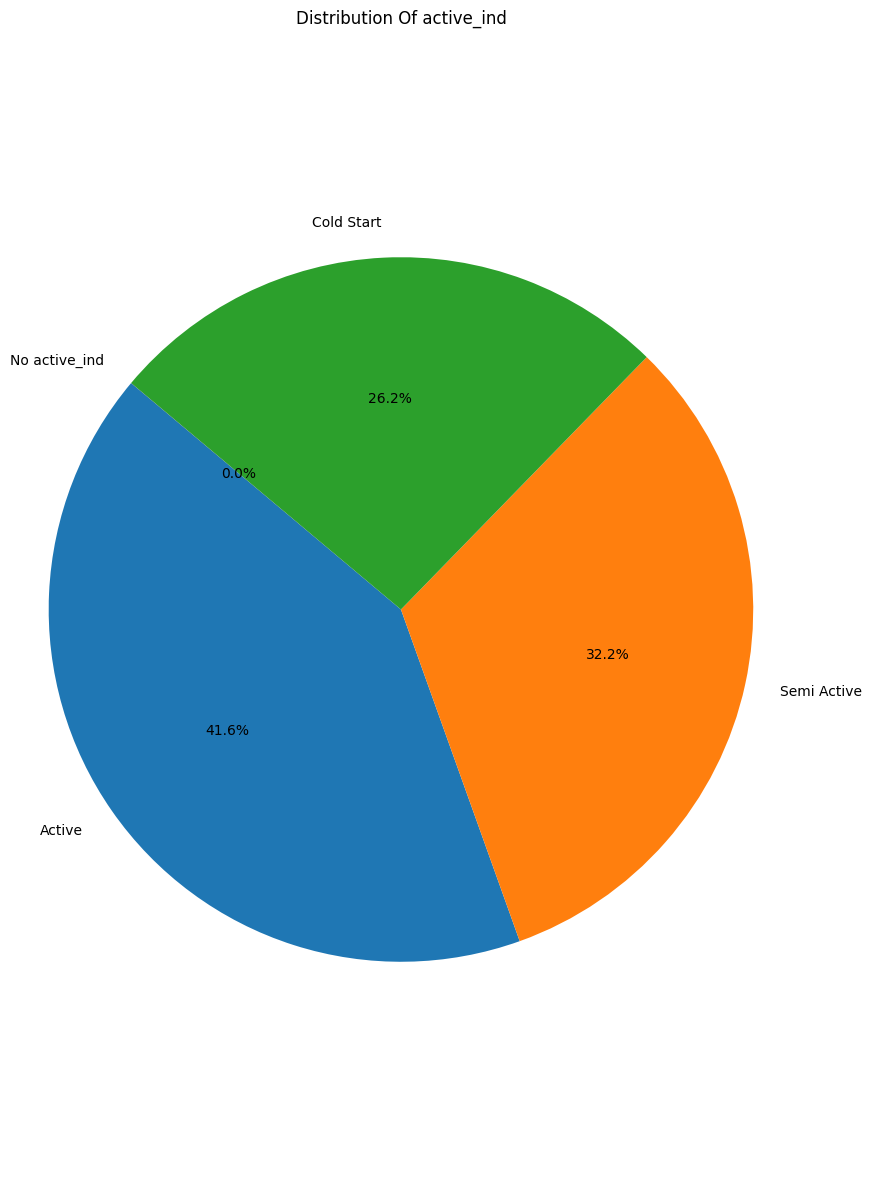

In [48]:
# Assuming df is your DataFrame with the "Genre" column

# Count the occurrences of each genre
genre_counts = df['active_ind'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 15))
genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution Of active_ind')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

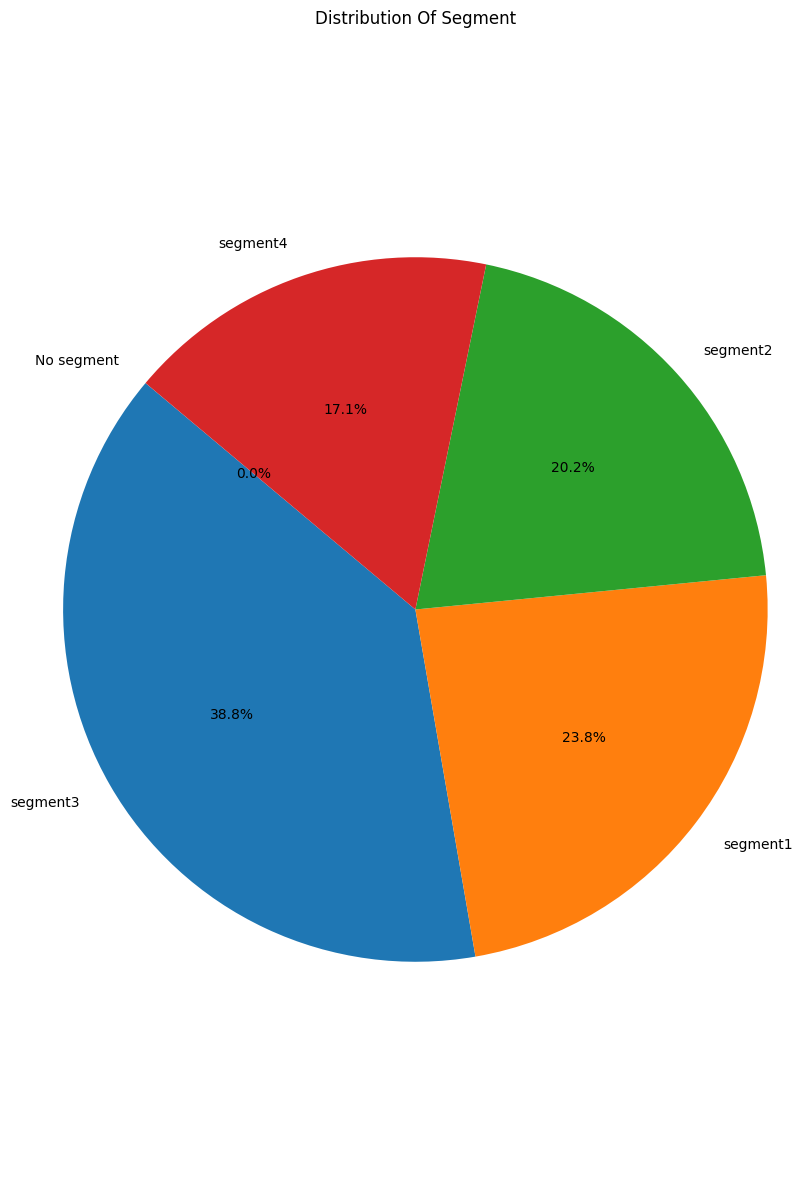

In [49]:
# Assuming df is your DataFrame with the "Genre" column

# Count the occurrences of each genre
genre_counts = df['segment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 15))
genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution Of Segment')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

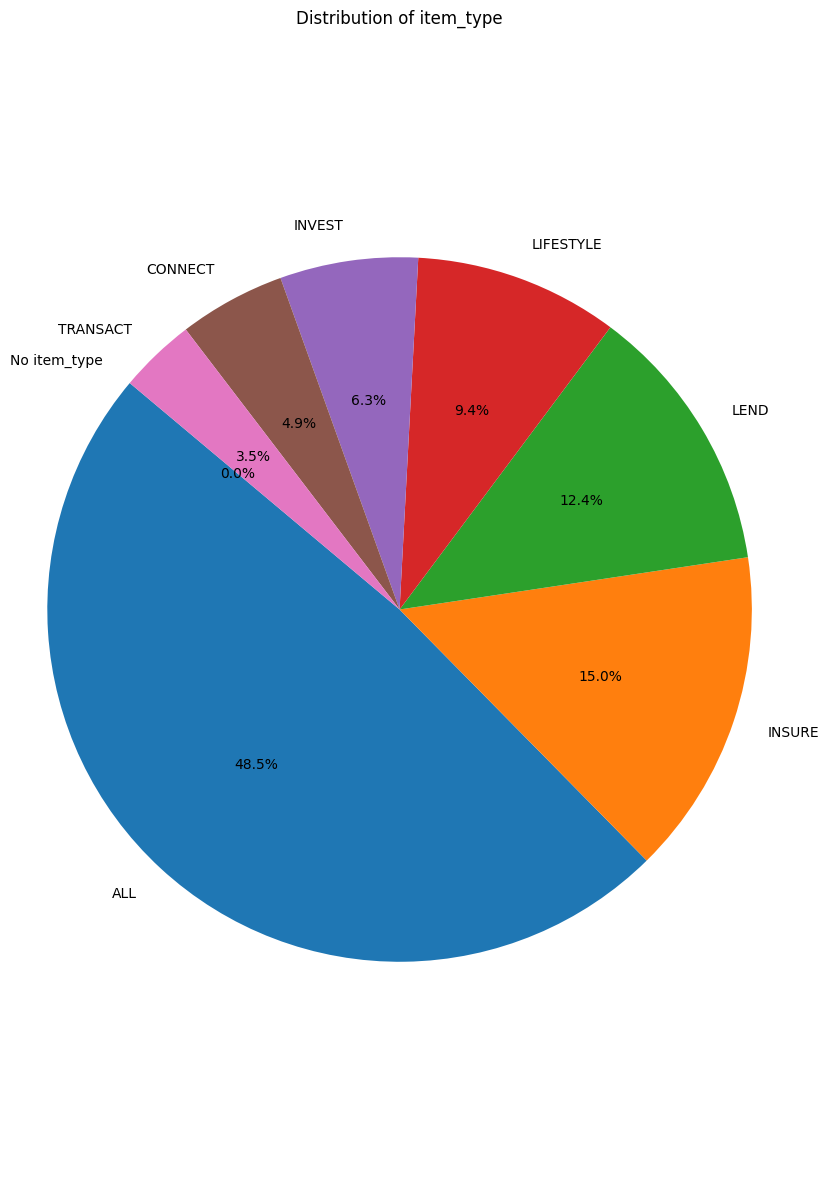

In [50]:
# Assuming df is your DataFrame with the "Genre" column

# Count the occurrences of each genre
genre_counts = df['item_type'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 15))
genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of item_type')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

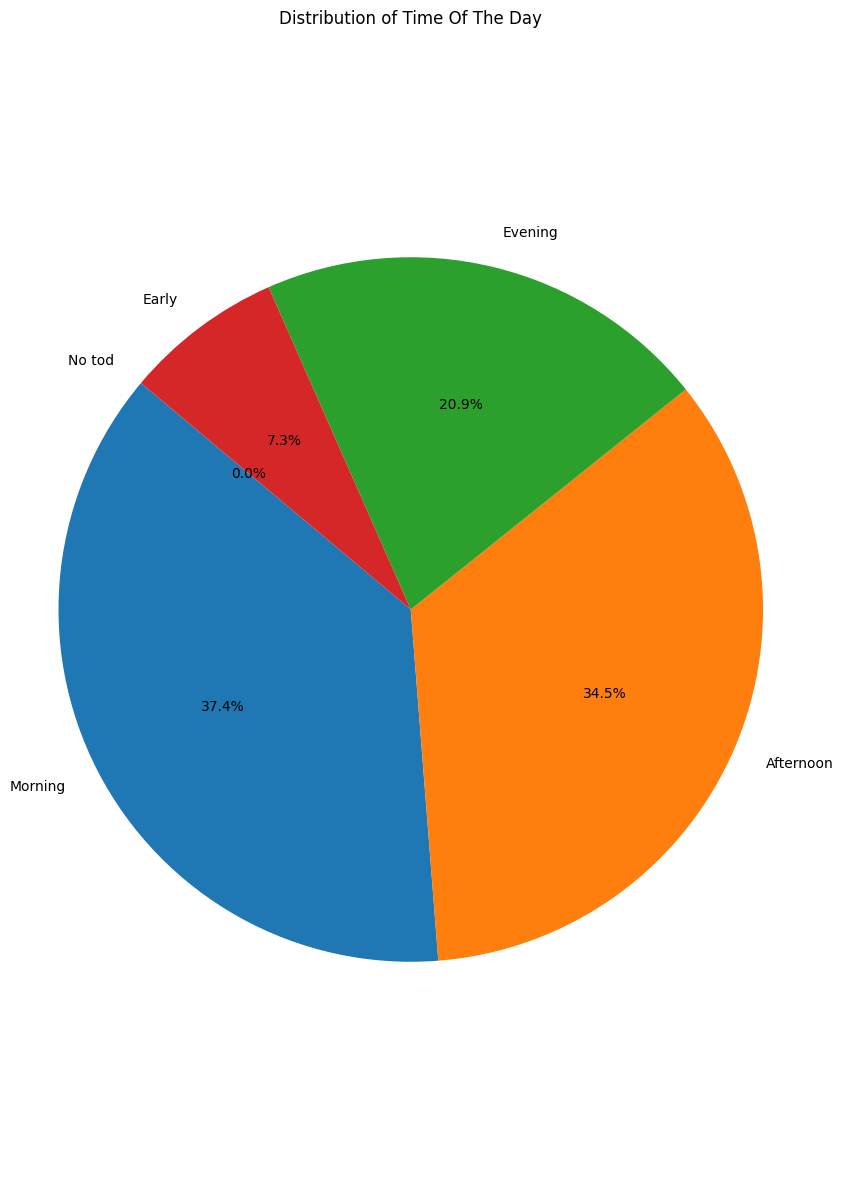

In [51]:
# Assuming df is your DataFrame with the "Genre" column

# Count the occurrences of each genre
genre_counts = df['tod'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 15))
genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Time Of The Day')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

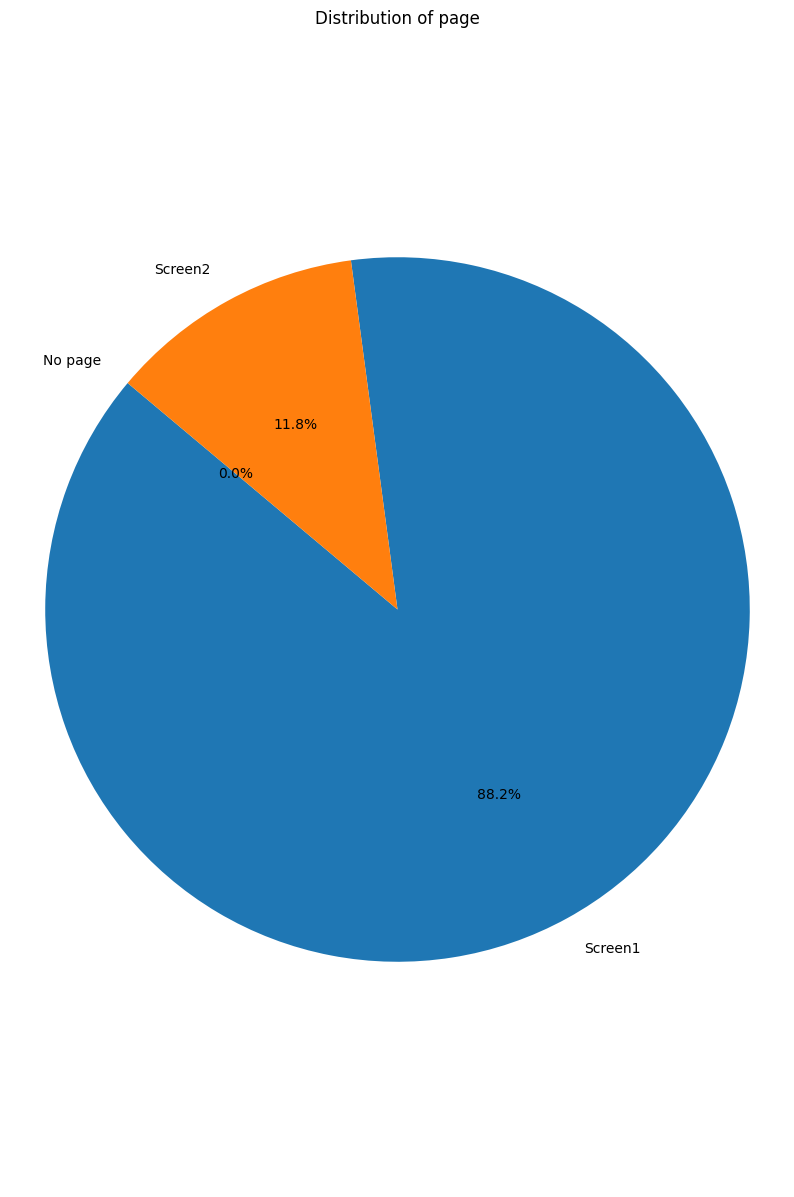

In [52]:
# Assuming df is your DataFrame with the "Genre" column

# Count the occurrences of each genre
genre_counts = df['page'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 15))
genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of page')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

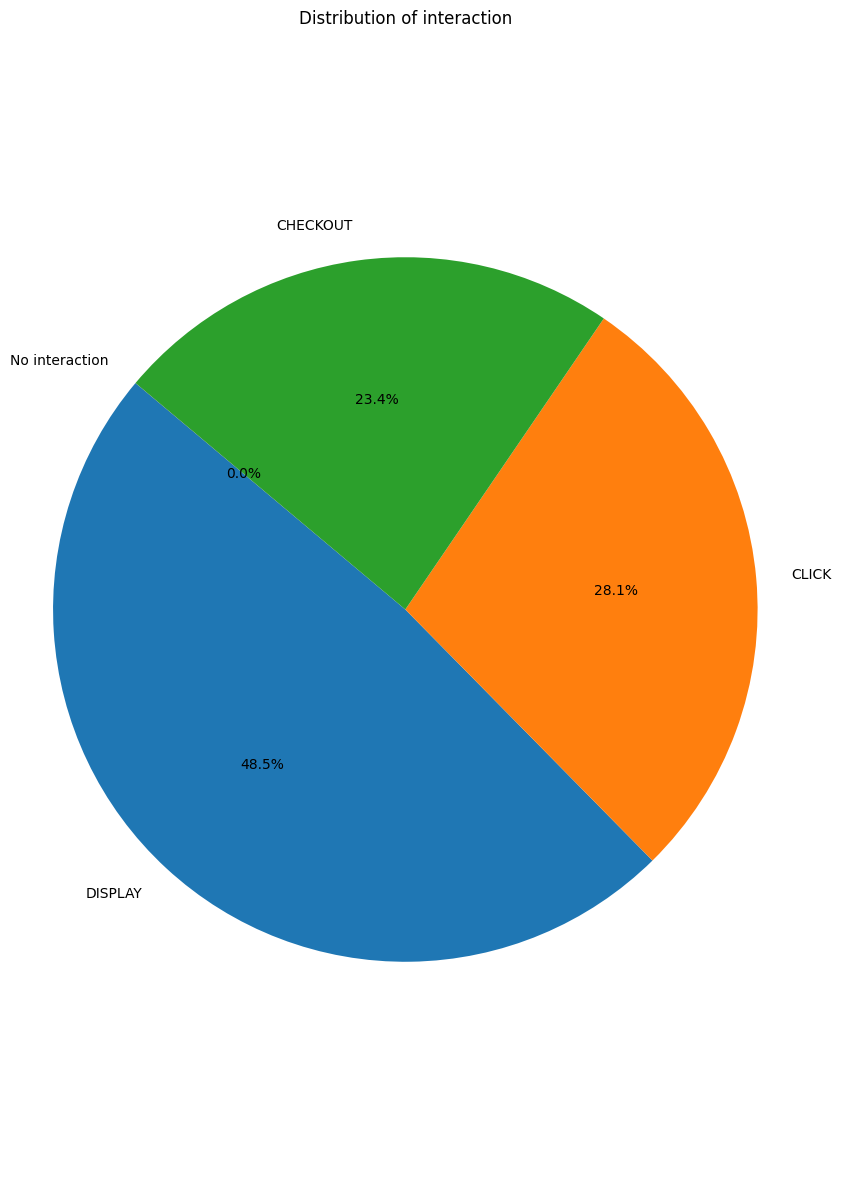

In [53]:
# Assuming df is your DataFrame with the "Genre" column

# Count the occurrences of each genre
genre_counts = df['interaction'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 15))
genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of interaction')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [56]:
#	idcol	interaction	int_date	item	page	tod	item_type	item_descrip	segment	beh_segment	active_ind

In [57]:
#MAKE A COPY OF DATA
data = df

In [ ]:
#CHANGE THE DATA TYPES TO INTEGERS
df["interaction"] = df["interaction"].str.replace("CHECKOUT", "1").str.replace("CLICK", "2").str.replace("DISPLAY", "3").str.replace("No interaction", "0")

# Convert the "Duration" column to integers
df["interaction"] = df["interaction"].astype(int)

In [62]:
#CHANGE THE DATA TYPES TO INTEGERS
df["page"] = df["page"].str.replace("Screen1", "2").str.replace("Screen2", "1").str.replace("No page", "0")

# Convert the "Duration" column to integers
df["page"] = df["page"].astype(int)

In [63]:
#CHANGE THE DATA TYPES TO INTEGERS


In [65]:
#CHANGE THE DATA TYPES TO INTEGERS
df["tod"] = df["tod"].str.replace("Morning", "4").str.replace("Afternoon", "3").str.replace("Evening", "2").str.replace("Early", "1").str.replace("No tod", "0")

# Convert the "Duration" column to integers
df["tod"] = df["tod"].astype(int)

In [66]:
#CHANGE THE DATA TYPES TO INTEGERS
df["segment"] = df["segment"].str.replace("segment1", "4").str.replace("segment3", "3").str.replace("segment2", "2").str.replace("segment4", "1").str.replace("No segment", "0")

# Convert the "Duration" column to integers
df["segment"] = df["segment"].astype(int)

In [68]:
#CHANGE THE DATA TYPES TO INTEGERS
df["item_type"] = df["item_type"].str.replace("ALL", "7").str.replace("INSURE", "6").str.replace("LEND", "5").str.replace("LIFESTYLE", "4").str.replace("CONNECT", "3").str.replace("INVEST", "2").str.replace("TRANSACT", "1").str.replace("No item_type", "0")

# Convert the "Duration" column to integers
df["item_type"] = df["item_type"].astype(int)

In [69]:
# Drop multiple columns in place
df.drop(columns=['int_date', 'item','item_descrip','beh_segment','active_ind'], inplace=True)

In [70]:
df.head()

,idcol,interaction,page,tod,item_type,segment
0,755,3,2,3,7,3
1,4521,3,2,3,7,4
2,4521,3,2,3,7,4
3,4521,3,2,4,7,4
4,4521,2,2,3,6,4


from matplotlib import pyplot as plt
_df_0['idcol'].plot(kind='hist', bins=20, title='idcol')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['interaction'].plot(kind='hist', bins=20, title='interaction')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['tod'].plot(kind='hist', bins=20, title='tod')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['item_type'].plot(kind='hist', bins=20, title='item_type')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='idcol', y='interaction', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='interaction', y='tod', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='tod', y='item_type', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='item_type', y='segment', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['idcol']
  ys = series['interaction']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('idcol', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('idcol')
_ = plt.ylabel('interaction')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['idcol']
  ys = series['tod']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('idcol', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('idcol')
_ = plt.ylabel('tod')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['idcol']
  ys = series['item_type']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('idcol', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('idcol')
_ = plt.ylabel('item_type')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['idcol']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'idcol'}, axis=1)
              .sort_values('idcol', ascending=True))
  xs = counted['idcol']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('idcol', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('idcol')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_12['idcol'].plot(kind='line', figsize=(8, 4), title='idcol')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['interaction'].plot(kind='line', figsize=(8, 4), title='interaction')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['tod'].plot(kind='line', figsize=(8, 4), title='tod')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['item_type'].plot(kind='line', figsize=(8, 4), title='item_type')
plt.gca().spines[['top', 'right']].set_visible(False)

In [71]:
# Select relevant columns for recommendation
df_recommend = df[['idcol', 'item_type', 'interaction']]

# Check data types
print(df_recommend.dtypes)

idcol          int64
item_type      int64
interaction    int64
dtype: object


In [72]:
!pip install scikit-learn
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357252 sha256=5fa3410aac83d3cc999cd4b39868b44465204d4cf28279ac4d44362a8f36bcf3
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [73]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split, cross_validate# Load the data into the Surprise dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_recommend[['idcol', 'item_type', 'interaction']], reader)

# Split the data into training and test sets
trainset, testset = train_test_split(data, test_size=0.15)

# Use SVD algorithm
algo = SVD()

# Train the algorithm on the trainset
algo.fit(trainset)

# Test the algorithm on the testset
predictions = algo.test(testset)

# Cross-validate the algorithm
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.3842  0.3693  0.3715  0.3739  0.3790  0.3760  0.3766  0.3814  0.3746  0.3779  0.3764  0.0042  
MAE (testset)     0.2840  0.2665  0.2716  0.2715  0.2774  0.2749  0.2761  0.2819  0.2741  0.2757  0.2754  0.0048  
Fit time          0.84    0.79    0.80    1.00    1.13    0.86    1.45    1.36    0.95    0.89    1.01    0.22    
Test time         0.03    0.03    0.03    0.03    0.04    0.03    0.05    0.05    0.03    0.03    0.03    0.01    


{'test_rmse': array([0.38424751, 0.36931487, 0.37153722, 0.37387286, 0.37901627,
        0.376027  , 0.37655838, 0.38139552, 0.37460327, 0.37791984]),
 'test_mae': array([0.28403286, 0.26648363, 0.27164741, 0.27146207, 0.27737969,
        0.27485344, 0.2760792 , 0.28191536, 0.2741301 , 0.27567129]),
 'fit_time': (0.8439631462097168,
  0.7916162014007568,
  0.800687313079834,
  1.0041134357452393,
  1.1330208778381348,
  0.8636283874511719,
  1.4462735652923584,
  1.360002040863037,
  0.9500460624694824,
  0.886674165725708),
 'test_time': (0.03400707244873047,
  0.030667781829833984,
  0.027217864990234375,
  0.03250241279602051,
  0.03597903251647949,
  0.029799461364746094,
  0.04574847221374512,
  0.04944348335266113,
  0.029109954833984375,
  0.029392242431640625)}

In [74]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split, cross_validate
from surprise import accuracy
# Evaluate the predictions using RMSE and MAE
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

RMSE: 0.3741
MAE:  0.2746
RMSE: 0.3741379404370886
MAE: 0.2746059939015343


In [75]:
# Perform cross-validation
cv_results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)

# Print average RMSE and MAE
print(f"Average RMSE: {cv_results['test_rmse'].mean()}")
print(f"Average MAE: {cv_results['test_mae'].mean()}")

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.3749  0.3759  0.3763  0.3802  0.3767  0.3748  0.3738  0.3767  0.3792  0.3744  0.3763  0.0020  
MAE (testset)     0.2750  0.2738  0.2747  0.2809  0.2745  0.2743  0.2712  0.2774  0.2795  0.2759  0.2757  0.0027  
Fit time          1.14    0.90    0.86    0.87    1.29    1.37    0.98    0.89    0.89    0.88    1.01    0.18    
Test time         0.15    0.03    0.07    0.03    0.05    0.05    0.03    0.14    0.04    0.03    0.06    0.04    
Average RMSE: 0.3762966336912879
Average MAE: 0.27571516374952154


In [95]:
# Select relevant columns for recommendation
df_recommend = df[['idcol', 'interaction', 'page', 'item_type']].copy()

# Convert categorical variables to categorical codes using .loc
df_recommend.loc[:, 'page'] = df_recommend['page'].astype('category').cat.codes
df_recommend.loc[:, 'item_type'] = df_recommend['item_type'].astype('category').cat.codes

# Load the data into the Surprise dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_recommend[['idcol', 'item_type', 'interaction']], reader)

# Split the data into training and test sets using Surprise's train_test_split
trainset, testset = train_test_split(data, test_size=0.25)

# Use SVD algorithm
algo = SVD()

# Train the algorithm on the trainset
algo.fit(trainset)

# List of all user_ids and item_ids
all_user_ids = df_recommend['idcol'].unique()
all_item_ids = df_recommend['item_type'].unique()

# Define the list of user IDs for which you want to generate recommendations
user_ids_to_recommend = ['u1', 'u2', 'u3', 'u4', 'u5']

# Function to get top N recommendations for a user with additional item details
def get_top_n_recommendations(user_id, n=5):
    # Get predictions for all items for the given user
    predictions = [algo.predict(user_id, item_id) for item_id in all_item_ids]

    # Sort the predictions by estimated rating in descending order
    predictions.sort(key=lambda x: x.est, reverse=True)

    # Get the top N recommendations
    top_n_predictions = predictions[:n]

    # Extract item_ids and corresponding details from the top N predictions
    top_n_items = [(pred.iid, df[df['item_type'] == pred.iid].iloc[0]) for pred in top_n_predictions]

    return top_n_items

# Loop through the list of user IDs and get recommendations
for user_id in user_ids_to_recommend:
    top_recommendations = get_top_n_recommendations(user_id, n=5)

    # Print the recommendations for the current user
    print(f"Top 5 recommendations for user '{user_id}':")
    for item_id, item_details in top_recommendations:
        print(f"Item ID: {item_id}, Interaction: {item_details['interaction']}, Page: {item_details['page']}, "
              f"Time of Day: {item_details['tod']}, Item Type: {item_details['item_type']}, Segment: {item_details['segment']}")
    print()  # Add a blank line between users

Top 5 recommendations for user 'u1':
Item ID: 7, Interaction: 3, Page: 2, Time of Day: 3, Item Type: 7, Segment: 3
Item ID: 0, Interaction: 0, Page: 0, Time of Day: 0, Item Type: 0, Segment: 0
Item ID: 3, Interaction: 2, Page: 2, Time of Day: 4, Item Type: 3, Segment: 4
Item ID: 1, Interaction: 2, Page: 1, Time of Day: 4, Item Type: 1, Segment: 2
Item ID: 5, Interaction: 2, Page: 1, Time of Day: 4, Item Type: 5, Segment: 3

Top 5 recommendations for user 'u2':
Item ID: 7, Interaction: 3, Page: 2, Time of Day: 3, Item Type: 7, Segment: 3
Item ID: 0, Interaction: 0, Page: 0, Time of Day: 0, Item Type: 0, Segment: 0
Item ID: 3, Interaction: 2, Page: 2, Time of Day: 4, Item Type: 3, Segment: 4
Item ID: 1, Interaction: 2, Page: 1, Time of Day: 4, Item Type: 1, Segment: 2
Item ID: 5, Interaction: 2, Page: 1, Time of Day: 4, Item Type: 5, Segment: 3

Top 5 recommendations for user 'u3':
Item ID: 7, Interaction: 3, Page: 2, Time of Day: 3, Item Type: 7, Segment: 3
Item ID: 0, Interaction: 0, P

**ITEM ID: **
ALL = 7
INSURE = 6
LEND = 5
LIFESTYLE = 4
CONNECT = 3
INVEST = 2
TRANSACT = 1
NO ITEM_TYPE = 0

**Time of the:**
Morning = 4
Afternoon = 3
Evening = 2
Early = 1

Segement:
Segement 1 = 4
Segement 2 = 2
Segement 3 = 3
Segement 4 = 1

Pages:
Screen 1 = 2
Screen 2 = 1
No Screen = 0

Active Indication:
Active = 3
Semi-active = 2
Cold Start = 1
No activeind = 0